# **Fashion MNSIT classification using Tensorflow-Keras(CNN)**

Dataset- Readily available as fashion_mnsit under datasets of keras<br>
<br>Characteristics of the dataset-</br>
i) resolution of images in dataset - 28 pixels * 28 pixels(pixel values ranging form 0-255)
<br>ii) 70,000 data points(60,000-training set|10,000- test set)
<br>iii) zero missing data</br>
<br>Target Variable - Labels</br>
<br>Labels - i)&ensp;   0 - T-shirt/top
<br>&emsp;&emsp;&emsp;&ensp;ii)&ensp; 1 - Trouser
<br>&emsp;&emsp;&emsp;&ensp;iii)&ensp;2 - Pullover
<br>&emsp;&emsp;&emsp;&ensp;iv)&ensp;3 - Dress
<br>&emsp;&emsp;&emsp;&ensp;v)&ensp; 4 - Coat
<br>&emsp;&emsp;&emsp;&ensp;vi)&ensp;5 - Sandal
<br>&emsp;&emsp;&emsp;&ensp;vii)  6 - Shirt
<br>&emsp;&emsp;&emsp;&ensp;viii)7 - Sneaker
<br>&emsp;&emsp;&emsp;&ensp;ix)&ensp;8 - Bag
<br>&emsp;&emsp;&emsp;&ensp;x)&ensp;   9 - Ankle boot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras as kr

In [2]:
fashion_mnist = kr.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Data Pre-Processing

In [3]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

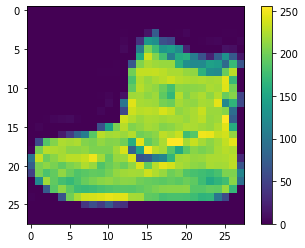

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Normalising data to range from 0 to 1 (instead of 0 - 255) for optimization algorithm to work faster

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

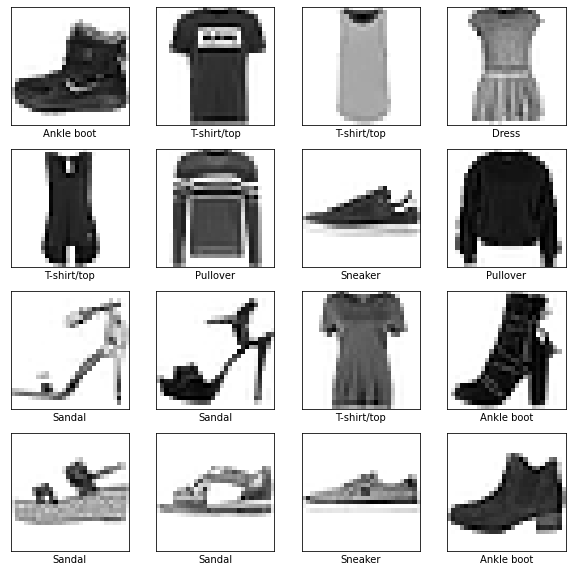

In [6]:
#displaying first 16 images
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(label_names[train_labels[i]])
    plt.imshow(train_images[i], cmap=plt.cm.binary)    
plt.show()

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
test_images.shape

(10000, 28, 28)

Reshaping image to be represented as a 3D matrice of dimension(28x28x1) for feeding data to CNN

In [9]:
#-1 is passed as first parameter to indicate that the number of examples is unknown and numpy is expected to figure it out
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1,28,28,1))

## Building the Model

In [10]:
#CNN Layers
model= kr.models.Sequential()
model.add(kr.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',strides=1, padding='same', data_format='channels_last', input_shape= (28,28,1), name='Conv2D_layer'))
model.add(kr.layers.MaxPooling2D((2,2), name= 'Maxpooling2D_Layer'))
model.add(kr.layers.BatchNormalization())

model.add(kr.layers.Flatten(name='FlattenLayer'))

#Hidden Layer
model.add(kr.layers.Dense(64, activation='relu',name='Hidden_Layer'))
model.add(kr.layers.BatchNormalization())

#Output Layer
model.add(kr.layers.Dense(10, activation='softmax',name='Output_Layer'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_layer (Conv2D)        (None, 28, 28, 32)        320       
_________________________________________________________________
Maxpooling2D_Layer (MaxPooli (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 32)        128       
_________________________________________________________________
FlattenLayer (Flatten)       (None, 6272)              0         
_________________________________________________________________
Hidden_Layer (Dense)         (None, 64)                401472    
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                6

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Model Fitting

In [13]:
model.fit(train_images, train_labels,epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 39s 20ms/step - loss: 0.4481 - accuracy: 0.8445
Epoch 2/3
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2477 - accuracy: 0.9097
Epoch 3/3
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1969 - accuracy: 0.9270


In [14]:
training_loss, training_accuracy = model.evaluate(train_images, train_labels)
print('Training accuracy {}'.format(round(float(training_accuracy), 2)))

1875/1875 [==============================] - 13s 7ms/step - loss: 0.1832 - accuracy: 0.9322
Training accuracy 0.93


In [15]:
test_loss,test_accuracy = model.evaluate(test_images, test_labels)
print('Test Accuracy {}'.format(round(float(test_accuracy),2)))

313/313 [==============================] - 3s 8ms/step - loss: 0.2786 - accuracy: 0.8996
Test Accuracy 0.9


## Making Predictions

In [18]:
probability_model = kr.Sequential([model, kr.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

## Verifying Predictions

In [20]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{}(trueLabel-{})".format(label_names[predicted_label],
                                label_names[true_label]),
                                color=color)

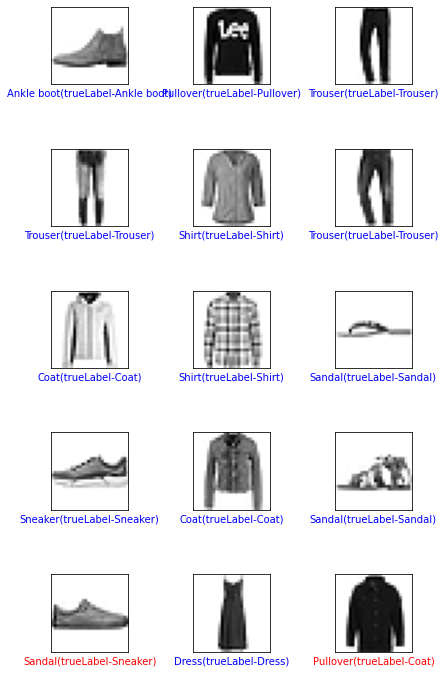

In [21]:
#Plotting first 15 images with their predicted labels and true labels
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
train_images = train_images.reshape((-1, 28, 28))
test_images = test_images.reshape((-1,28,28))
for i in range(num_images):
  plt.subplot(num_rows, num_cols, i+1)
  plot_image(i, predictions[i], test_labels, test_images)
plt.tight_layout()
plt.show()